In [1]:
%matplotlib notebook
from imp import reload  # Python 3.0 - 3.3
       
from matplotlib import pyplot as plt
from matplotlib import rc
# rc('text', usetex=True)

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
54634.5            2.17485e-17 ...           2.296745e-17           2.052955e-17
54570.5            1.17266e-16 ...          1.1971156e-16          1.1482044e-16
54571.5             1.1511e-16 ...          1.1756078e-16          1.1265922e-16
54572.5            1.12951e-16 ...          1.1540617e-16          1.1049583e-16
54573.5            1.10794e-16 ...          1.1325266e-16          1.0833534e-16
54574.5             1.0864e-16 ...          1.1110118e-16          1.0617882e-16
54575.5            1.06492e-16 ...          1.0895466e-16          1.0402934e-16
54576.5            1.04352e-16 ...          1.0681508e-16          1.0188892e-16
54577.5            1.02221e-16 ...          1.0468338e-16           9.975862e-17
54569.5        

/Users/berto/Code/verbose-enigma/pycoco/classes.py:2338: UserWarning: No self.lambda_effective set.
  warnings.warn("No self.lambda_effective set.")


<IPython.core.display.Javascript object>


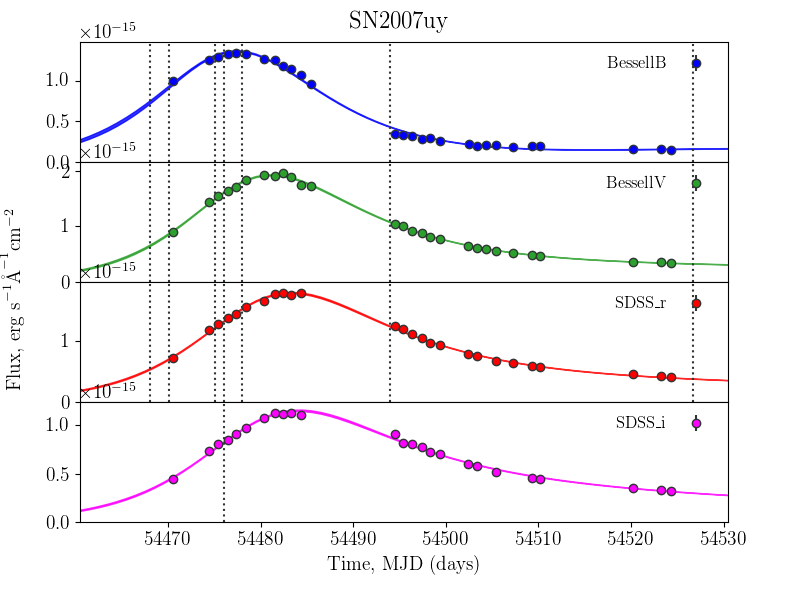

In [2]:
snname = "SN2007uy"

sn = pcc.classes.SNClass(snname)
sn.load_phot( path = os.path.join(pcc.defaults._default_data_dir_path, "lc/"+ snname + ".dat"))
sn.load_list(os.path.join(pcc.defaults._default_list_dir_path, snname + ".list"))

sn.load_spec()
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))
sn.check_overlaps()

sn.plot_lc(xextent=60, showsnname=True)

<IPython.core.display.Javascript object>


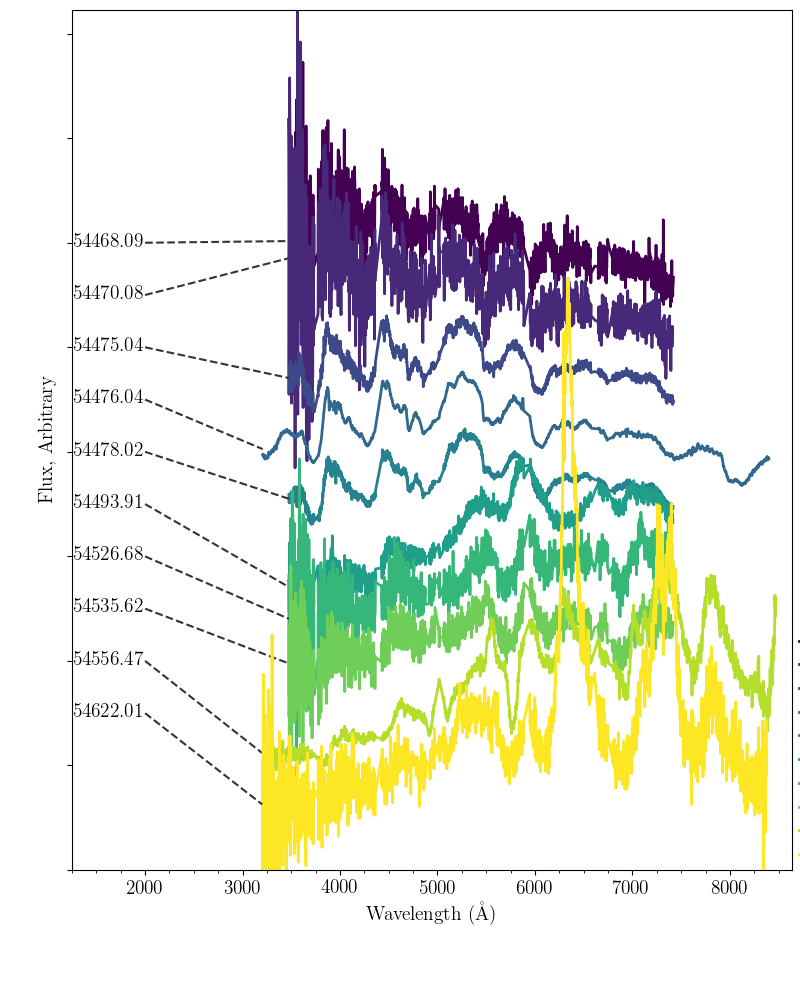

In [3]:
sn.plot_spec()

In [4]:
[sn.spec[i].mjd_obs for i in sn.spec]

[54468.089999999997,
 54470.080000000002,
 54475.040000000001,
 54476.040000000001,
 54478.019999999997,
 54493.910000000003,
 54526.68,
 54535.620000000003,
 54556.470000000001,
 54622.010000000002]

In [5]:
spec = sn.spec["2007uy_-5.06.txt"]

In [6]:
spec.__dict__

{'_default_data_dir_path': '/Users/berto/Code/CoCo/data/spec/',
 '_default_list_dir_path': '/Users/berto/Code/CoCo/lists/',
 '_overlapping_filter_list': array(['BessellB', 'BessellV', 'SDSS_r', 'SDSS_i'],
       dtype='<U8'),
 'data': <Table length=2664>
 wavelength          flux         
  Angstrom  erg / (Angstrom cm2 s)
  float64          float64        
 ---------- ----------------------
 3205.99597            7.37566e-18
 3207.94955            7.35002e-18
 3209.90313            7.17612e-18
 3211.84664            7.19023e-18
 3213.80022            7.05795e-18
  3215.7538            7.29444e-18
 3217.69731            7.28246e-18
 3219.65089            7.34563e-18
 3221.60447            7.04906e-18
        ...                    ...
 8381.30128            7.08707e-18
 8383.25486            6.69805e-18
 8385.19837            6.56222e-18
 8387.15195            6.55783e-18
 8389.09546            6.56944e-18
 8391.04904            6.76741e-18
 8393.00262            6.96102e-18
 8394.9461

In [7]:
sn.phot.data_filters

OrderedDict([('BessellB', <pycoco.classes.FilterClass at 0x1125e0198>),
             ('BessellV', <pycoco.classes.FilterClass at 0x11260d5f8>),
             ('SDSS_r', <pycoco.classes.FilterClass at 0x112637550>),
             ('SDSS_i', <pycoco.classes.FilterClass at 0x10996a198>)])

In [8]:
filter_name = "BessellB"
S = sn.spec["2007uy_-5.06.txt"]

for i, filter_name in enumerate(sn.phot.data_filters):
    flux = pcc.kcorr.calc_spectrum_filter_flux(filter_object=sn.phot.data_filters[filter_name], spectrum_object=S)
    print(flux)
    if i == 0:
        S.specphot = Table(names = ("lambda_effective", "flux", "filter"), dtype=('f4', 'f4', 'S'))

    S.specphot.add_row((sn.phot.data_filters[filter_name].lambda_effective, flux, filter_name))
    

Filter_area =  958.905389226
Integrated flux =  1.25909260411e-14
1.31305196348e-17
Filter_area =  893.09534922
Integrated flux =  1.3248860846e-14
1.48347663635e-17
Filter_area =  1108.16294901
Integrated flux =  1.31211171171e-14
1.18404221408e-17
Filter_area =  1097.45661135
Integrated flux =  8.54903671189e-15
7.78986305562e-18


<IPython.core.display.Javascript object>


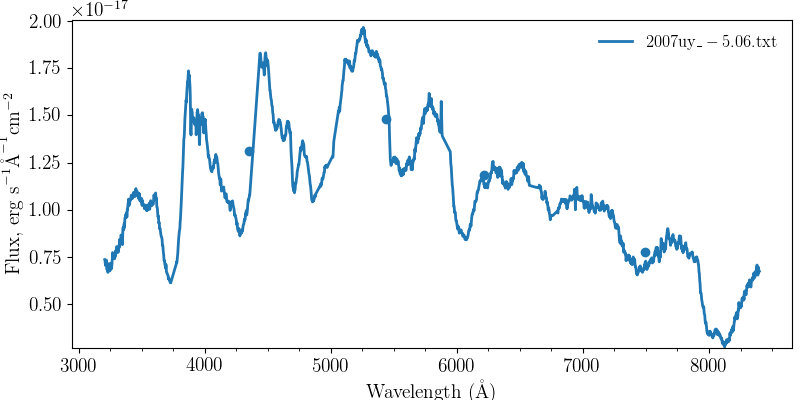

In [9]:
fig = sn.spec["2007uy_-5.06.txt"].plot(return_figure = True)

ax = fig.add_subplot(111)

ax.scatter(S.specphot["lambda_effective"], S.specphot["flux"])

In [10]:
S.specphot

lambda_effective,flux,filter
float32,float32,bytes32
4354.41,1.31305e-17,BessellB
5436.87,1.48348e-17,BessellV
6213.67,1.18404e-17,SDSS_r
7491.96,7.78986e-18,SDSS_i


In [11]:
sn.phot.data_filters[filter_name].__dict__.keys()

dict_keys(['_wavelength_units', '_frequency_units', 'data', 'wavelength', 'throughput', 'wavelength_u', '_filter_file_path', 'filter_name', '_plot_colour', 'lambda_effective', '_cumulative_throughput', '_cumulative_throughput_spline', '_upper_edge', '_lower_edge', '_wavelength_orig', '_throughput_orig', '_effective_area', 'zp_AB'])

In [12]:
from astropy.modeling import blackbody as bb
from astropy.table import Table, Column, Row
from astropy import units as u

In [13]:
bb.blackbody_lambda

<function astropy.modeling.blackbody.blackbody_lambda>

<IPython.core.display.Javascript object>


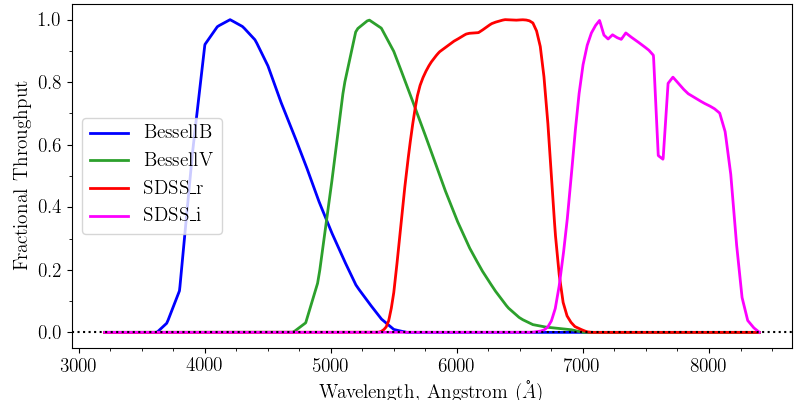

In [14]:
sn.plot_filters()

In [15]:
# fig = plt.figure()

# ax1 = plt.subplot(111)
# ax1.plot(np.arange(len(sn.phot.data_filters["BessellB"].wavelength)), ((sn.phot.data_filters["BessellB"].wavelength - 3205.99597)/1.95358)- np.arange(len(sn.phot.data_filters["BessellB"].wavelength)))

In [16]:
filter_name = "SDSS_i"
new_max_wavelength = 9500
wav_interval = 1.0

orig_wavelength = sn.phot.data_filters[filter_name].wavelength
extend_wavelength = np.append(np.arange(orig_wavelength[-1]+1.0, new_max_wavelength, wav_interval), new_max_wavelength)

In [17]:
bb_flux = bb.blackbody_lambda(np.array(orig_wavelength)*u.AA, temperature=10000*u.Kelvin)

dt_blackbody = Table([orig_wavelength, bb_flux], names=("wavelength", "flux"))

In [18]:
bb_S = pcc.classes.SpectrumClass()

In [19]:
bb_S.load_table(dt_blackbody)

<IPython.core.display.Javascript object>


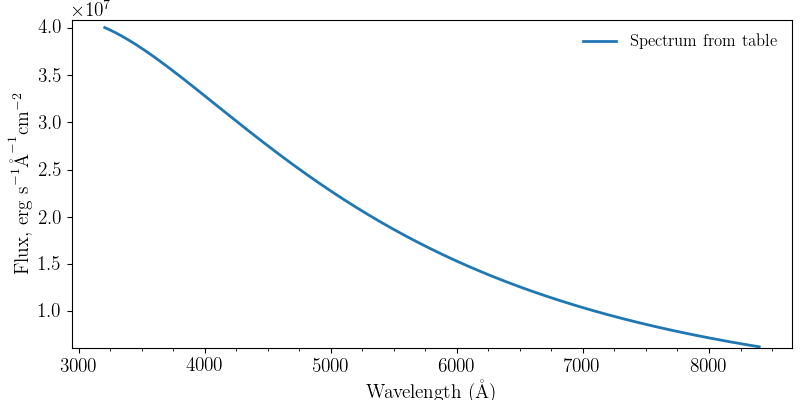

In [20]:
bb_S.plot()

In [21]:
# type(sn.phot.data_filters)
bb_S.check_overlaps(sn.phot.data_filters, verbose = True)

0 <pycoco.classes.FilterClass object at 0x1125e0198>
True
1 <pycoco.classes.FilterClass object at 0x11260d5f8>
True
2 <pycoco.classes.FilterClass object at 0x112637550>
True
3 <pycoco.classes.FilterClass object at 0x10996a198>
True


In [22]:
bb_S._overlapping_filter_list

array(['BessellB', 'BessellV', 'SDSS_r', 'SDSS_i'],
      dtype='<U8')

In [23]:
bb_S.get_specphot(sn.phot.data_filters, verbose = True)

28514915.9343
18762067.6354
14371586.0993
8717790.12859


/Users/berto/Code/verbose-enigma/pycoco/classes.py:594: UserWarning: no overlapping filters
  warnings.warn("no overlapping filters")


In [24]:
bb_S.specphot

lambda_effective,flux,filter
float32,float32,bytes32
4354.41,2.85149e+07,BessellB
5436.87,1.87621e+07,BessellV
6213.67,1.43716e+07,SDSS_r
7491.96,8.71779e+06,SDSS_i


<IPython.core.display.Javascript object>


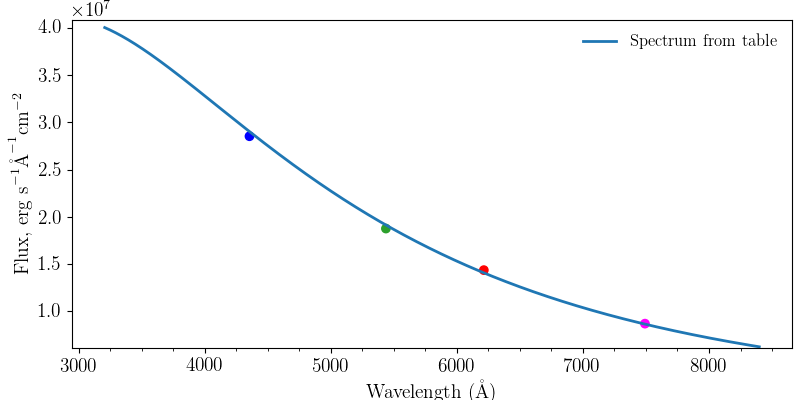

In [26]:
fig = bb_S.plot(return_figure=True)

ax1 = fig.add_subplot(111)
ax1.scatter(bb_S.specphot["lambda_effective"], bb_S.specphot["flux"], label="Specphot",
            c = [pcc.colours.hex[i] for i in sn.phot.data_filters])


In [39]:
red_bb_S = pcc.classes.SpectrumClass()
red_bb_S.load_table(dt_blackbody)
red_bb_S.check_overlaps(sn.phot.data_filters)

red_bb_S.flux = pcc.extinction.unred(red_bb_S.wavelength, red_bb_S.flux, EBV=-1)

<IPython.core.display.Javascript object>


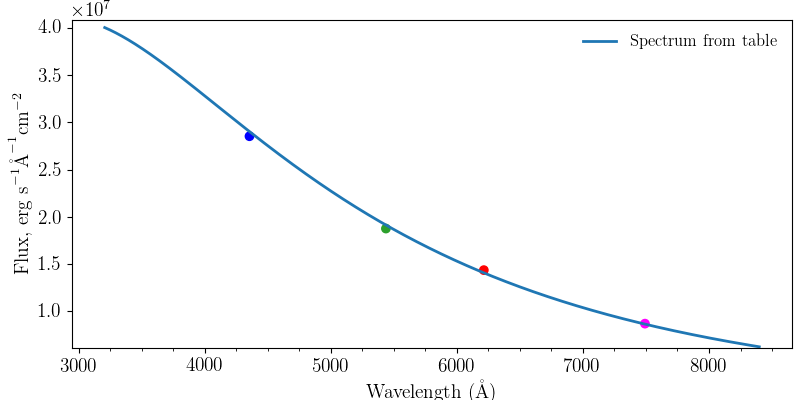

In [40]:
fig = bb_S.plot(return_figure=True)

ax1 = fig.add_subplot(111)
ax1.scatter(bb_S.specphot["lambda_effective"], bb_S.specphot["flux"], label="Specphot",
            c = [pcc.colours.hex[i] for i in sn.phot.data_filters])

ax1.plot(red_bb_S.wavelength, red_bb_S.flux, color = "C1")

<IPython.core.display.Javascript object>


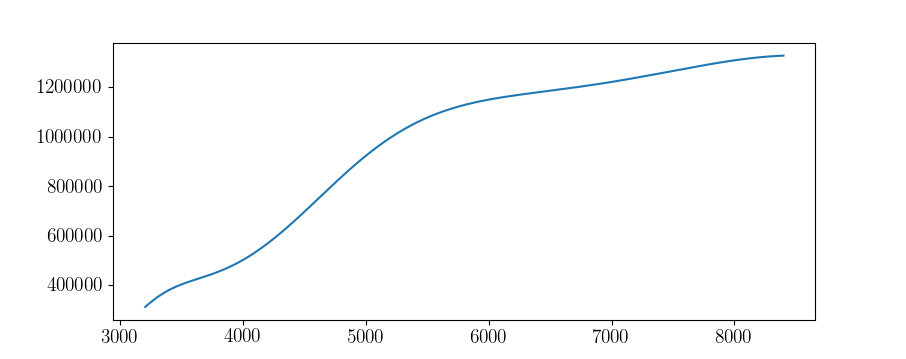

In [32]:
fig = plt.figure()

ax1 = plt.subplot(111)
ax1.plot(red_bb_S.wavelength, red_bb_S.flux)

In [ ]:
# isinstance(sn.phot.data_filters, dict)
len(sn.phot.data_filters)

In [ ]:
filter_objects = sn.phot.data_filters
verbose=True
for i, filter_name in enumerate(filter_objects):
    filter_obj = filter_objects[filter_name]
    
    if verbose:print(i, filter_obj)

    if hasattr(filter_obj, "_lower_edge") and \
      hasattr(filter_obj, "_upper_edge") and \
      hasattr(bb_S, "data"):
        print(i, filter_obj)

In [ ]:
ap.modeling.blackbody.blackbody_lambda([1000]*u.AA, 1000)

In [ ]:
new_wavelength = orig_wavelength[::-1].insert(0, extend_wavelength[::-1])[::-1]

In [ ]:
new_wavelength

In [ ]:
new_wavelength